<a href="https://colab.research.google.com/github/kostkalab/mol-evol_notebooks/blob/main/lecture_mol_evol_03_20_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Continous time Markov chain (CTMC)

Our current model is using discrete time steps, where transition probabilities are defined by the transition matrix $P$:

$$
\begin{aligned}
&P(X_t = j  | X_{t-1} = i) = P_{ij} &\text{one step transition}\\
&P(X_t = j | X_0 = i) = (P)^t_{ij}\; \text{with}\; t=1,2,3,\ldots &\text{multi-step transition}
\end{aligned}
$$

In the following we will generalize this model for continous times.

## Rate Matrix $Q$

We have seen in the lecture that we can define such a CTM by a ($4\times 4$) rate matrix (denoted by $Q$), defined as follows:

$$
\begin{aligned}
\frac{d}{dt} P(t)_{ij} = \sum\nolimits_kP(t)_{ik}Q_{kj} 
\end{aligned}
$$

Or, equivalently, via the matrix exponential as

$$
P(t) = \text{expm}\big(Qt\big)
$$

Some important take aways are:

- Since $Q$ determines $P(t)$ it governs the substitution process.
- $Q$ does not change over time (in our *stationary* models). If we specify $Q$ we have parameterized our model completely.
- Therefore, to describe different substitution models, researchers parameterize the rate matrix. 
- Key quantities of the substitution process follow directly from the rate matrix.

**Interpretation of rate matrix entries**

- $Q_{ij}\geq 0 \; \text{for} \; i \neq j$: How "quickly" ($\rightarrow$ *rate*) does the transition from $i$ to $j$ happen? "Pressure" to leave state $i$ for state $j$.
- $Q_{ii} \leq 0$: The "pressure" ($\rightarrow$ *rate*) for transitioning away for state $i$.
- The rate of "going away" from state $i$ is the sum of the rates of $i$ transitioning into other states $j \neq i$.
$$-Q_{ii} = \sum\nolimits_{k\neq i} Q_{ik} $$

Key quantities of the substitution process follow directly from the rate matrix:

## Equilibrium distribution

At equilibrium, probabilities of sampling a nucleotide (or "state") don't change:

$$
\sum\nolimits_k \pi_k Q_{ki} = \sum\nolimits_{k\neq i}\pi_k Q_{ki} + \pi_i Q_{ii} =0
$$

Which means that $\pi$ is a left eigenvector of $Q$ with eigenvalue zero. That is $Q$ determines equlibrium frequencies (as expected). 


Since $P(t) = \text{expm}(Qt) = \mathbb{1} + \sum_n \frac{1}{n!}Q^nt^n$ it follows for the transition probabilities:

$$
\sum\nolimits_k \pi_k P_{ki} = \pi_i
$$

That is because above in the matrix exponential only the $\mathbb{1}$ contributes, the powers of $Q$ all amount to zero.

This means that $\pi$ is a left eigenvector of $P$ with eigenvalue one, as we already know from the previous lecture.

## Expected number of substitutions

A key quantity of interest is the expected number of substitutions (for a given choice of the time parameter $t$); for exapmle, think about saturation. Let $n(t)$ the the number of stubsitutions that occur until time $t$. Importantly, this includes "back-substitutions" of the type $i\rightarrow j \rightarrow i$ that would not be observed in measures of sequence divergence ($\rightarrow$ *saturation*). From the rate matrix we get directly

$$
E[n(t)] = -\sum_k \pi_k Q_{kk} t
$$

Where $E[\;]$ denotes the expectation. You can think about it as "running" many processes (which all may have different numbers of (unobserved) substitutions) and then taking the avarage. 

We see that $E[n(t)]$ is a linear function of $t$.

**Scaling of the substitution matrix for unit time**

We see from the equation above that multiplying $Q$ by a constant changes substitution rates (for the same $%$). Equivalently, only the product $Qt$ does have meaning. Therefore, $Q$ can be normalized such that $t$ directly indicates the expected number of substitutions by setting that for $t=1$:

$$
-\sum_k \pi_k Q_{kk} = 1
$$


## Time reversibility

Time reversible models are a subclass of substitution models we discussed. For these models "time works the same in both directions". Specifically, that means that:

$$
\pi_iP(t)_{ij} = \pi_jP(t)_{ji}
$$

The probability of bein in $i$ and going from $i$ to $j$ (say, forward in time) is the same as the probability of being in $j$ and going from $j$ to $i$ (say, backward in time). The same holds for the rate matrices:

$$
\pi_i Q_{ij} = \pi_j Q_{ji}
$$

From which then the equation involving transition probabilities follows. For time reversible models the following are equivalent:

$$
\begin{aligned}
\sum\nolimits_k \pi_k P(t1)_{ki} P(t_2)_{kj} & =  \sum\nolimits_k \pi_i P_{ik}(t_i)P_{kj}(t_2) \\
&= \pi_i P(t_1+t_2)_{ij} \\
&= \pi_j P(t_1+t_2)_{ji} 
\end{aligned}
$$

This is the reason the likelihood in our example from last lecture was not well determined and we could only see the correct sum of time steps, but not determine $t_1$ and $t_2$ individually.

## Parameterization of the rate matarix

A commonly used parameterization for all time-reversible models for the rate matrix is

$$
Q = \left(\begin{array}{cccc}
-         & a \,\pi_c& b \,\pi_g & c \,\pi_t\\
a \,\pi_a & -        & d \,\pi_g & e \,\pi_t\\
b \,\pi_a & d \,\pi_c& -         & f \,\pi_t\\
c \,\pi_a & e \,\pi_c& f \,\pi_g & - \\
\end{array}\right)
$$

Where the exchangeability parameters $\{a,b,c,d,e\}$ are non-negative and scaled such that $\sum_i \pi_i Q_{ii} = 1$ (see above).

Note, this parameterization answers our previous question of how to design a process where the equilibrium frequencies are different from q all being $1/4$. 

Some parameterization of the rate matrix have names. The above (most general one) is called **g**eneral **t**ime **r**eversible model (GTR). 

- Jukes Cantor model:
  $$
  \begin{aligned}
  a=b=c=d=e=f=:\mu\\
  \pi_a = \pi_c = \pi_g = \pi_t = 1/4
  \end{aligned}
  $$
  And we can fix $\mu$ by scaling $Q$ such that $E[n(t=1)] =1$:
  $$
  \frac{3}{4}\mu \,4 = 1 \;{\leftrightarrow} \; \mu = \frac{1}{3}
  $$
  So that we get
  $$
  Q_{i\neq j} = \frac{1}{12}
  $$
  And there is no free parameter in the substitution matrix, just the time $t$.
- Two parameter model: Distinguish 
  - Transversions: $Q_{AC} = Q_{CA}= Q_{AT} = Q_{TA} = Q_{CG} = Q_{GC} = Q_{GT} = Q_{TG} = a$
  - Transitions: $Q_{AG}=Q_{GA}=Q_{CT}= Q_{TC} = b$
  
  From scaling we get:
  - $a \in [0, \frac{1}{8}]$
  - $b = \frac{1}{4} - 2a \; \in \; [0, \frac{1}{4}]$
 
 And for equilibrium frequencies we get $\pi_i = 1/4$

# Simulating alignments with `rphast`

The `rphast` package provides functionality for simulating alignments and performing maximum likelihood estimation of substitution model parameters (amongst other things).

First, we install the rphast package:



***Get set up with a transition matrix (and DNA sequence)***



In [ ]:
#- Define four nucleotides
NUCLEOTIDES = c('A','C','G','T')

#- Make a transition matrix
P = matrix(1/4, ncol=4, nrow=4)
colnames(P) <- rownames(P) <- NUCLEOTIDES

#- A random sequence of nucleotides
set.seed(16386489)
seq1 <- sample(NUCLEOTIDES, 40, replace = TRUE)

#- Change our current subsitutions matrix
diag(P) <- 1.5
P       <-  P/rowSums(P)

#- Function for printing sequences
print_seqs <- function(seq1, seq2){
#----------------------------------
  
  diffs <- c(' ', '|')[(seq1 != seq2) + 1]
  line1 <- paste0(seq1,  collapse = "")
  line2 <- paste0(diffs, collapse = "")
  line3 <- paste0(seq2,  collapse = "")
  
  paste0(line1,'\n',line2,'\n', line3, '\n', collapse ='') |> cat()
  
}

,A,C,G,T
A,0.6666667,0.1111111,0.1111111,0.1111111
C,0.1111111,0.6666667,0.1111111,0.1111111
G,0.1111111,0.1111111,0.6666667,0.1111111
T,0.1111111,0.1111111,0.1111111,0.6666667


# Multi-step transitions

In the current framework we can ask, what is the probability of going from nucleotide `i` to nucleotide `j` in two (or more) "steps". One step is one "application" of the transition matrix described above.

Not that for the **matrix product** of the transition matrix wiht itself we have:

$PP = \{PP\}_{ij}$

$(PP)_{ij} = \sum_{k=1}^4 P_{ik}P_{kj}$

Which is the sum over all possitilities `k` for nucleotide `i` transitioning into another nucleotide `k` and then `k` transitioning into `j`. 

* Two step transition: $PP = P^2$
* Three step transition: $PPP = P^3$
* Four step transition: $PPPP = P^4$
* ...


At this point, we also recall the definition of $P$ and use a RV $X$ to denote nucleotides and an index to denote "time". The $ij$-the element of the transition matrix is, for example,  the probability that that $X_1=j$, conditional on $X_0=i$ (i.e., transition from $i$ to $j$).
 
$\begin{aligned}
P_{ij} &= \text{Pr[nucleotide }i \rightarrow \text{nucleotide }j \text{]} \\
  &= \text{Pr[}X_1=j|X_0=i \text{]} \\
  &= \text{Pr[}X_t=j|X_{t-i}=i \text{]} 
\end{aligned}
$

If we now think about nucleotide substitutios **over time** we can think about a *discrete time* model where $P$ describes transitions for each time step:
```
0   1   2   3     t = 0, 1, 2, ...
|---|---|---|---> time
  P   P   P   P   transition probabilities betweentime points 
```

In this setting we can ask for the transition probabilities comoprising $t$ steps:

$
P_{ij}(t) := \text{Pr}[x_t = j | x_0=i]
$

The model we are using is a **homogenous Markov chain** (i.e., the transition matrix $P$ is always the same) to describe nucleotide transitions. Note that in 

Let $X_t$ the random variable describing the nucleotide at time $t$. Then, for any Markov chain 

$\text{Pr}[X_t|X_{t-1}, X_{t-2}, \ldots , X_0] = \text{Pr}[X_t|X_{t-1} ] \quad \text{(Markov property)}$

which in our case is clear, from how we constructed the model.

Next, we ask about the multi-step (i.e., $t$>1) transition probabilities:

* $t$ = 2 : $P(t=2) = PP = P^2:$

 $
 \begin{aligned}
 P_{ij}(2)  &=\text{Pr}[X_2 = j| X_0=i]\\
             &=\text{Pr}[X_2 = j, X_0=i] \big/ \text{Pr}[X_0=i]\\ 
             &=\sum_\nolimits k
             \text{Pr}[X_2 = j, X_1 =k,  X_0=i] \big/ \text{Pr}[X_0=i]\\ 
             &=\sum_\nolimits k
             \text{Pr}[X_2 = j | X_1 =k,  X_0=i] \text{Pr}[X_1=k, X_0=i\text{]} \big/ \text{Pr}[X_0=i\text{]}\\
             &=\sum_\nolimits k
             \text{Pr}[X_2 = j | X_1 =k] \text{Pr}[X_1=k, X_0=i\text{]} \big/ \text{Pr}[X_0=i\text{]}\\
             &=\sum_\nolimits k
             \text{Pr}[X_2 = j | X_1 =k] \text{Pr}[X_1=k| X_0=i\text{]} \text{Pr}[X_0=i]\big/ \text{Pr}[X_0=i\text{]}\\
             &=\sum_\nolimits k \text{Pr}[X_1 = k| X_0=i] \text{Pr}[X_2 = j| X_1=k]\\
             &=\sum_\nolimits k P_{ik}P_{kj}\\
\end{aligned}
$

* $t$ = 3 : $P(t=3) = PPP = P^3$

And in general

$
P(t) = P^t 
$


# Chapman Kolmogorov Equation

With the same rational one can obtain the following result:

$P(t+h) = P(t)P(h)$

$P(t+h)_{ij} = \sum\nolimits_k P(t)_{ik}P(h)_{kj}$


Next, we will use our transition matrix to explor multi-step transition probabil

In [ ]:
P

,A,C,G,T
A,0.6666667,0.1111111,0.1111111,0.1111111
C,0.1111111,0.6666667,0.1111111,0.1111111
G,0.1111111,0.1111111,0.6666667,0.1111111
T,0.1111111,0.1111111,0.1111111,0.6666667


In [ ]:
P %*% P

,A,C,G,T
A,0.4814815,0.1728395,0.1728395,0.1728395
C,0.1728395,0.4814815,0.1728395,0.1728395
G,0.1728395,0.1728395,0.4814815,0.1728395
T,0.1728395,0.1728395,0.1728395,0.4814815


In [ ]:
P %*% P %*% P

,A,C,G,T
A,0.3786008,0.2071331,0.2071331,0.2071331
C,0.2071331,0.3786008,0.2071331,0.2071331
G,0.2071331,0.2071331,0.3786008,0.2071331
T,0.2071331,0.2071331,0.2071331,0.3786008


In [ ]:
P %*% P %*% P %*% P

,A,C,G,T
A,0.3214449,0.2261850,0.2261850,0.2261850
C,0.2261850,0.3214449,0.2261850,0.2261850
G,0.2261850,0.2261850,0.3214449,0.2261850
T,0.2261850,0.2261850,0.2261850,0.3214449


In [ ]:
P %*% P %*% P %*% P %*% P %*% P %*% P 

,A,C,G,T
A,0.2622505,0.2459165,0.2459165,0.2459165
C,0.2459165,0.2622505,0.2459165,0.2459165
G,0.2459165,0.2459165,0.2622505,0.2459165
T,0.2459165,0.2459165,0.2459165,0.2622505


In [ ]:
P %*% P %*% P %*% P %*% P %*% P %*% P %*% P %*% P %*% P %*% P %*% P

,A,C,G,T
A,0.2506483,0.2497839,0.2497839,0.2497839
C,0.2497839,0.2506483,0.2497839,0.2497839
G,0.2497839,0.2497839,0.2506483,0.2497839
T,0.2497839,0.2497839,0.2497839,0.2506483


What are your observations?

What happens to the frequency of each nucleotide in our sequence, as subsitutions go on?

# Equilibrium frequencies

Note that for very long times $t$

$P_{ij}^{t \rightarrow \infty} = \pi_j \quad \text{(rows are all the same)}$

where the vector $\pi = (\pi_A,\pi_C, \pi_G, \pi_T)^T$ denotes **equilibrium frequencies**. From above it is clear that, no matter what sequence we start with, after long enough time the frequencies of nuclotides are determined by the equlibrium frequences.

Further on, equilibirum frequencies satisfy:

$\sum\nolimits_i \pi_i P_{ij} = \pi_j $, or without index notation: $\pi^T P = \pi^T$

* What are the equilibrium frequencies of our transition matrix $P$
* Why are they so "boring"?
* Do you think equilibrium frequencies are of biological relevance when we are modeling substitution rates?
* Time permitting, can you make a transition matrix with more interesting equlibrium frequencies? For examle, GC-content should be 55%, AT-content 45%? What would you have to do? 

# Likelihood of an observed sequence, maximum likelihood principle

With the tools we have now we can now formulate the following model, based on a transition matrix $P$:

```
      ancestor ~ equilirium frequencies
  P(t1) /  \ P(t2)
       /    \
species1     species2
```

-  An ancestor sequence is generated using the equilibrium distribution. Let $X^a[m]$ denote the $m$-th nucleotide of an ancestral DNA sequence of length $l$. Then:
 
  $X^a[m] \sim \pi \; \text{for}\, i=1,\ldots, l$.

- This ancestral sequence is observed after $t=t_1$ time steps for species 1 and $t+t_2$ steps for species 2.

  Let $X^1[m]$  and $X^2[m]$ denote the $m$-th nucleotide in species 1 and species 2. Then:

  $\begin{aligned}
  \text{Pr}[X^1[m] = x^1[m], X^2[m] = x^2[m]] &= \sum\nolimits_k \text{Pr}[X^1[m]| X^a[k]]\, \text{Pr}[X^2[m]|X^a[k]] \text{Pr}[X^a[m] = k] \\
  &= \sum\nolimits_k \pi_k P(t_1)_{k,x^1[m]}P(t_2)_{k,x^2[m]}
  \end{aligned}$

  And for the whole sequence we need to multiply probabilities:

  $\text{Pr}[\{X^1[m], X^2[m]\} = \{x^1[m],x^2[m]\}] = \prod_{m=1}^l \sum\nolimits_k \pi_k (P^{t_1})_{k\,x^1[m]}(P^{t_2})_{k\,x^2[m]} $

  which is also called the **likelihood** of the observations ($\{x^1[m], x^2[m]\}$) under our model, consiting of $P$ (and thereby, $\pi$) and $\{t_1,t_2\}$. The **log likelihood** is 

  $l(\{x^1[m], x^2[m]\}) = \log\big(\text{Pr}[\{x^1[m],x^2[m]\}]\big)  = \sum_{m=1}^l \log\big(\sum\nolimits_k \pi_k P^{t_1}_{k\,x^1[m]} P^{t_2}_{kx^2[m]}\big)$ 

Importantly, the likelihood depends on model parameters while the observed data (i.e., nucleotides) are fixed.  Therefore, it is often viewed as a function of these parameters and sometimes written as

$l\big(\{P_{ij}\}, t_1, t_2; \{x^1[m], x^2[m]\}\big) \; \text{or just}\; l\big( \{P_{ij}\}, t_1, t_2\big)$

It is then possible to use observed data (in our case, the nucleotides $\{x^1[m], x^2[m]\}$) to determine the best-fitting model via **maximum likelihood**; that is, find the model paramters that maximize the likelihood:

$
\{P^*_{ij}\}, t_1^*, t_2^* = \text{argmax}_{P_{ij},t_1, t_2} \; l\big( \{P_{ij}\}, t_1, t_2\big)
$

Next, we will generate an observed sequenc according to the model we discussed and then use the maximum likelihood principle to "re-discover" the value for $t$.

In [ ]:
#- we know our equilibrium frequences, more on that later
eq_freqs = rep(1/4,4)

#- simulate ancestral sequence, 100 nucleotides
set.seed(12342135)
seq_anc <- sample(NUCLEOTIDES, size =100 , prob = eq_freqs, replace = TRUE)

#- take three time steps to the observed sequence
P1 = P
P2 = P %*% P 
seq_1 <- sapply(seq_anc, \(nuc) sample(NUCLEOTIDES, size = 1, prob = P1[nuc,]))
seq_2 <- sapply(seq_anc, \(nuc) sample(NUCLEOTIDES, size = 1, prob = P2[nuc,]))
print_seqs(seq_1, seq_2)


GCGCACTCTTCGACGATTCAATATTTGATCCTGAACCTAACGGCTAGCCTGTTTGTAACTAACCCCCTGTCATTGGGCCATTTCGGTAGTTCCAAAAGAT
| | || | ||  |  || |||      ||||| |||||||  || | |||| |||  | |||||||||||||    || | ||  |||   |||||   
TCACTATATCTGAGGAACCTCAATTTGAAGTATACTGGGGAGGGAACCGATGTCACAAATTGGTGAACTGACGTGGGAAAGTAAGGCCATTCTTTTGGAT


Now we forget about the ancestral sequence (not observed) and calculate the likelihood for different values of $t$:

In [ ]:
if(require("expm") == FALSE){
  install.packages("expm")
  library(expm)
}

get_likelihood <- function(seq_1, seq_2, t1, t2){
  #- transition from ancestor to observed
  Pt1 <- P %^% t1
  Pt2 <- P %^% t2
 
  #- for each nucleotide position:
  nuc_fu <- function(pos){
    nuc1 <- seq_1[pos]
    nuc2 <- seq_2[pos]
    res  <- (eq_freqs * Pt1[,nuc1] * Pt2[,nuc2]) |> sum() |> log()
  }
  
  loglikes <- sapply(seq_len(seq_1 |> length()), \(x) nuc_fu(x) )

  #- log likelihood for observed sequence
  loglik <- loglikes |> sum()

  return(loglik)
}

my_ts <- expand.grid(1:5, 1:5)
liks  <- apply(my_ts, 1, function(x) get_likelihood(seq_1, seq_2, x[1], x[2]))
liks


[1] -275.2375 -273.1502 -273.9137 -275.0305 -275.8970 -273.1502 -273.9137
 [8] -275.0305 -275.8970 -276.4621 -273.9137 -275.0305 -275.8970 -276.4621
[15] -276.8034 -275.0305 -275.8970 -276.4621 -276.8034 -277.0018 -275.8970
[22] -276.4621 -276.8034 -277.0018 -277.1148

Now we plot our result so we can better assess

In [ ]:
df = data.frame(t1 = my_ts[,1], t2 = my_ts[,2], log_likelihood = liks)
df

t1,t2,log_likelihood
<int>,<int>,<dbl>
1,1,-275.2375
2,1,-273.1502
3,1,-273.9137
4,1,-275.0305
5,1,-275.8970
1,2,-273.1502
2,2,-273.9137
3,2,-275.0305
4,2,-275.8970


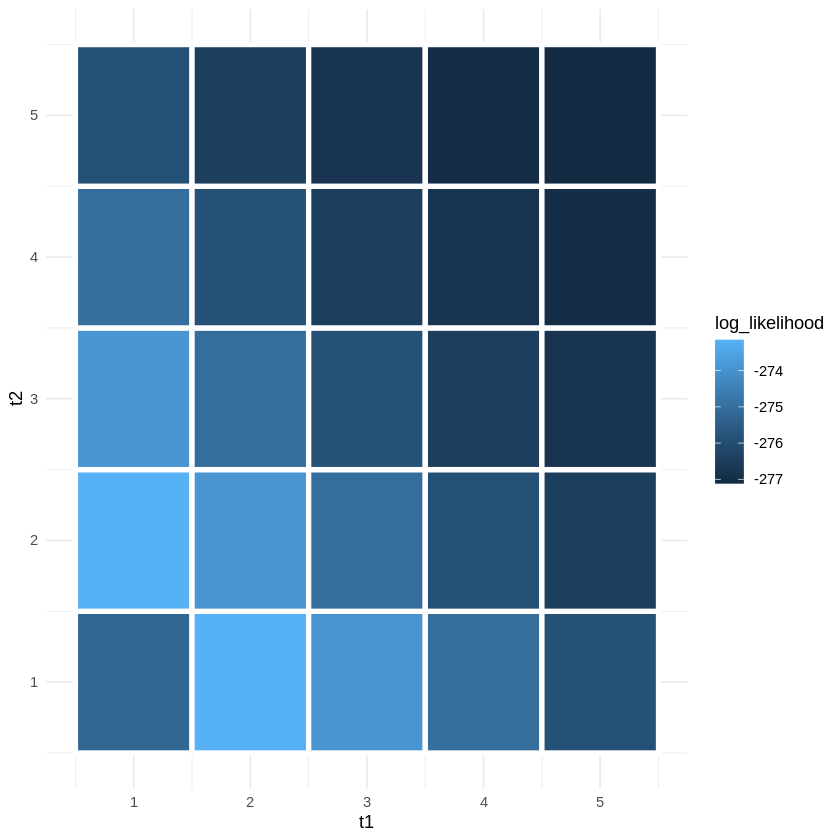

In [ ]:
library(ggplot2)
ggplot(df, aes(x = t1, y = t2, fill = log_likelihood)) +
  geom_tile(color = "white",
            lwd = 1.5,
            linetype = 1)  + theme_minimal()

- Do we get the right result?

- Do you observe a symmetry? 

- Why might this be reasonable?